#  Hierarchical Clustering

***Problem Statement:*** Consider the dataset zoo.csv and look at the info in the first five rows. The first
column denotes the animal name and the last one specifies a high-level class for the corresponding animal.
Find a solution to the following questions:
<li>• Unique number of high-level class</li>
<li>• Perform agglomerative clustering using the 16 intermediate features</li>
[ Hint: Refer to the agglomerative clustering (Hierarchical Clustering) module in Scikit learn and
set the number of clusters appropriately ]
Refer the below link for further documentation:
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
<li>• Compute the mean squared error by comparing the actual class and predicted high-level class.</li>

***Objective:*** Perform agglomerative clustering with appropriate MSE value.

***Additional Resource(Source: Analytics Vidhya)*** - <a href = 'https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/'>Simple Explanation</a>

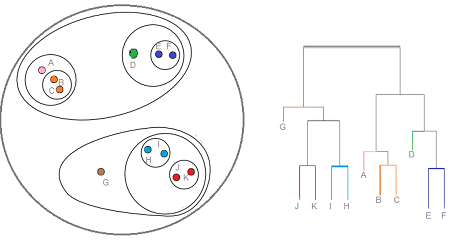

**Image Source:** Statistics How To

### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Preprocessing

In [2]:
zoo = pd.read_csv('zoo.csv')

In [3]:
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
zoo.shape

(101, 18)

In [8]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


From the above output, it can be observed that the dataset has no null values.

In [10]:
zoo.duplicated().any()

False

There are no duplicate values as well.

In [11]:
zoo['class_type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

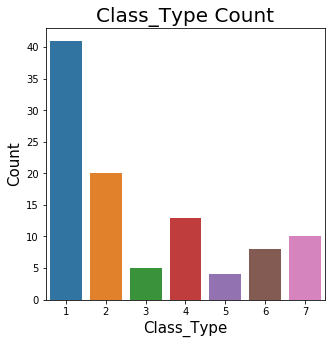

In [15]:
plt.figure(figsize = (5,5))
sns.countplot(zoo['class_type'])
plt.title('Class_Type Count', fontsize = 20)
plt.xlabel('Class_Type',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

It can be observed that the datset is made up of 7 classes. We can directly put this value as cluster value. But we will find the optimal number of clusters as we are doing unsupervised learning.

***Additional Resource(TowardsDataScience.com)*** - <a href= 'https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad'>Methods to find Optimum no. of Cluters</a>

Let's get rid of columns - animal_name and class_type from the datasets.

In [16]:
zoo_df = zoo.iloc[:,1:-1]
zoo_df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [18]:
zoo_df.shape

(101, 16)

We will use Dendogram for Hierarchial Clustering but we need to get a proper Dendogram through which we can judge optimum no. of clusters. There are different type of Cluster Distance Algorithm and we need to use the one which best represents the dataset. To get the Distance Algorithm, we will use Cophenetic Correlation Coefficient(CCC).

***Additional Resource(TowardsDataScience.com)*** - <a href= 'https://towardsdatascience.com/hierarchical-clustering-in-python-using-dendrogram-and-cophenetic-correlation-8d41a08f7eab'>CCC</a>

In [93]:

dist = ['single','complete','average','centroid','median','ward']
cop = []
Z = shc.single(pdist(zoo_df))
cop.append(shc.cophenet(Z))
Z = shc.complete(pdist(zoo_df))
cop.append(shc.cophenet(Z))
Z = shc.average(pdist(zoo_df))
cop.append(shc.cophenet(Z))
Z = shc.centroid(pdist(zoo_df))
cop.append(shc.cophenet(Z))
Z = shc.median(pdist(zoo_df))
cop.append(shc.cophenet(Z))
Z = shc.ward(pdist(zoo_df))
cop.append(shc.cophenet(Z))

cop_sum = []
for i in range(len(cop)):
    a = cop[i].sum()
    cop_sum.append(a)
print(cop_sum)
cop_sum = pd.DataFrame(data = cop_sum,index = dist)
cop_sum = cop_sum.T
cop_sum

[9752.582348507349, 24997.985899238724, 17339.502459348652, 14786.156581583795, 18150.31817365068, 84764.7625081737]


,single,complete,average,centroid,median,ward
0,9752.582349,24997.985899,17339.502459,14786.156582,18150.318174,84764.762508


From above observation, it can be seen that 'Ward' gives better result as compared to other distance algorithms.

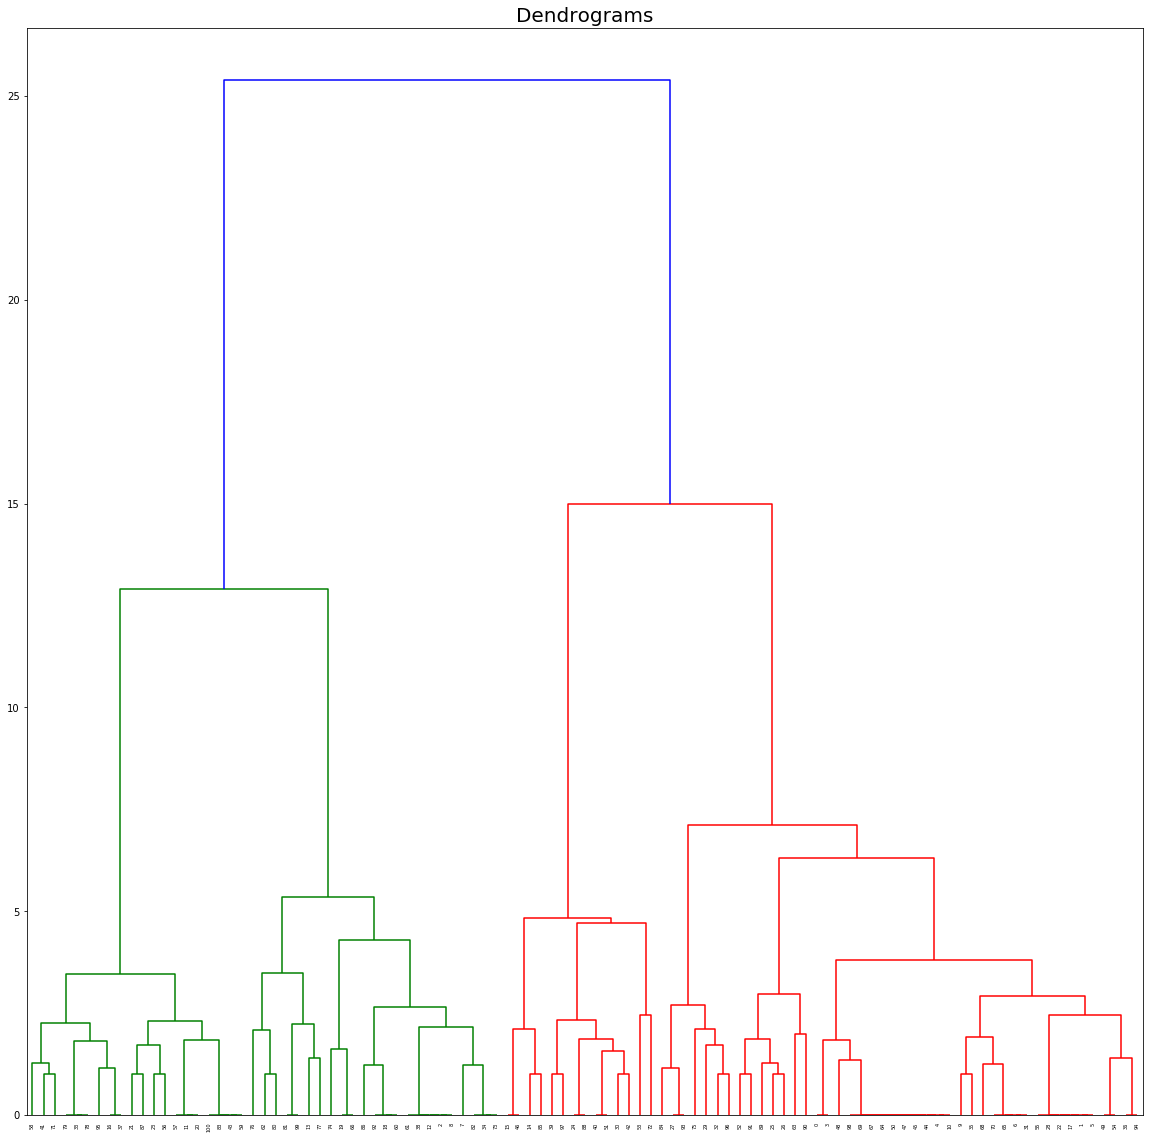

In [92]:
# Dendogram for Heirarchical Clustering
from scipy.cluster import hierarchy as shc
from scipy.spatial.distance import pdist

plt.figure(figsize=(20, 20))  
plt.title("Dendrograms", fontsize = 20)  
dend = shc.dendrogram(shc.linkage(zoo_df, method='ward'))
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.cophenet.html
plt.show()

Drwaing a line parallel to X-axis from y=5, gives us 7 clusters.

***Agglomerative Clustering***-<a href='https://www.geeksforgeeks.org/ml-hierarchical-clustering-agglomerative-and-divisive-clustering/'>Extra Reading Resource(GeeksForGeeks)</a>

In [97]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

model = AgglomerativeClustering(n_clusters = 7,linkage = 'ward',affinity = 'euclidean')
#For Linkage = ward, affinity will be euclidean as ward has this affinity.

In [98]:
model.fit(zoo_df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=7)

In [116]:
pred_labels=model.labels_

In [100]:
print(np.unique(model.labels_))

[0 1 2 3 4 5 6]


In [133]:
#Will make the label same for dataset with output of model
labels = np.array(zoo['class_type'])
labels = labels-1
print(labels)

[0 0 3 0 0 0 0 3 3 0 0 1 3 6 6 6 1 0 3 0 1 1 0 1 5 4 4 0 0 0 5 0 0 1 3 0 0
 1 3 5 5 1 5 1 0 0 6 0 0 0 0 5 4 6 0 0 1 1 1 1 3 3 2 0 0 0 0 0 0 0 0 1 6 3
 0 0 2 6 1 1 2 6 3 1 0 6 3 1 5 4 2 2 3 0 0 1 0 5 0 6 1]


In [132]:
print(np.concatenate((labels.reshape(len(labels),1),pred_labels.reshape(len(pred_labels),1)),1))

[[0 1]
 [0 1]
 [3 2]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [3 2]
 [3 2]
 [0 1]
 [0 1]
 [1 3]
 [3 2]
 [6 6]
 [6 0]
 [6 0]
 [1 3]
 [0 1]
 [3 2]
 [0 2]
 [1 3]
 [1 3]
 [0 1]
 [1 3]
 [5 0]
 [4 5]
 [4 5]
 [0 4]
 [0 1]
 [0 4]
 [5 0]
 [0 1]
 [0 4]
 [1 3]
 [3 2]
 [0 1]
 [0 1]
 [1 3]
 [3 2]
 [5 0]
 [5 0]
 [1 3]
 [5 0]
 [1 3]
 [0 1]
 [0 1]
 [6 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [5 0]
 [4 5]
 [6 0]
 [0 1]
 [0 1]
 [1 3]
 [1 3]
 [1 3]
 [1 3]
 [3 2]
 [3 2]
 [2 6]
 [0 5]
 [0 1]
 [0 1]
 [0 2]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 3]
 [6 0]
 [3 2]
 [0 2]
 [0 4]
 [2 6]
 [6 6]
 [1 3]
 [1 3]
 [2 6]
 [6 6]
 [3 2]
 [1 3]
 [0 4]
 [6 0]
 [3 2]
 [1 3]
 [5 0]
 [4 5]
 [2 5]
 [2 5]
 [3 2]
 [0 4]
 [0 1]
 [1 3]
 [0 4]
 [5 0]
 [0 1]
 [6 6]
 [1 3]]


In [113]:
from sklearn.metrics import mean_squared_error

score = mean_squared_error(labels,model.labels_)
print(score)
abs_error = np.sqrt(score)
print(abs_error)

7.5049504950495045
2.7395164710308832
